In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import fuzz.fuzzy_membership as fuzz

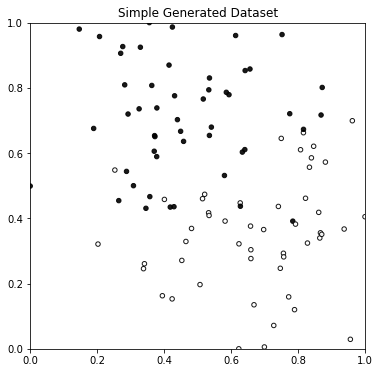

In [20]:
# Generate the toy classification data
np.random.seed(16)
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

# Rotate it a bit - purely asthetic
theta = 2 * np.pi / 3
R = np.array([[np.cos(theta), np.sin(theta) * -1], [np.sin(theta), np.cos(theta)]])
X1 = np.matmul(X1, R.T)

# Scale it to [0, 1]. This looks nice but is also necessary for the fuzzy membership functions to work
scaler = MinMaxScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(x=X1[:,0], y=X1[:,1], c=Y1, cmap='binary', edgecolor='k', alpha=0.9, s=20)
ax.set_title('Simple Generated Dataset')

plt.show()

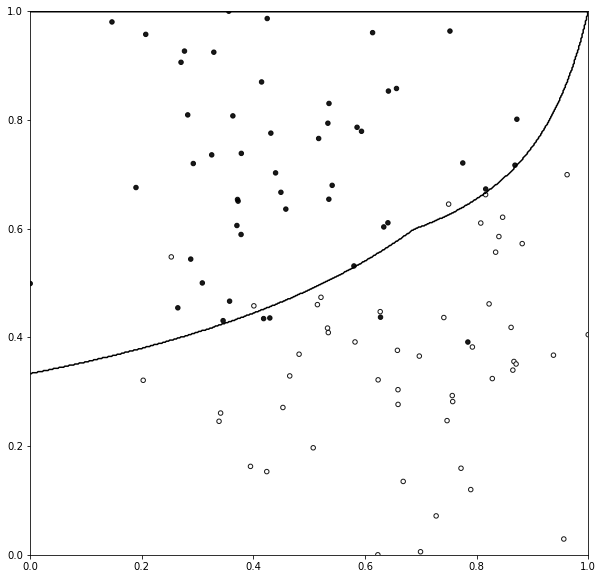

In [38]:
# Boundaries with no reject
res = 501
data = pd.read_csv("data/toy_no_reject.txt", usecols=range(res), nrows=501, header=None).to_numpy()
data.shape

x = np.linspace(0, 1, res)
y = np.linspace(0, 1, res)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.contour(X, Y, data[::-1], levels=[0.5], colors=['black'])
ax.scatter(x=X1[:,0], y=X1[:,1], c=Y1, cmap='binary', edgecolor='k', alpha=0.9, s=20)

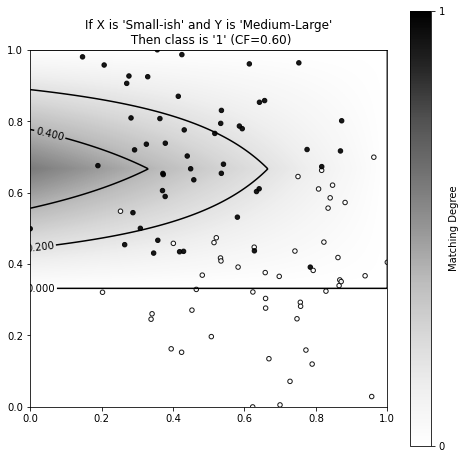

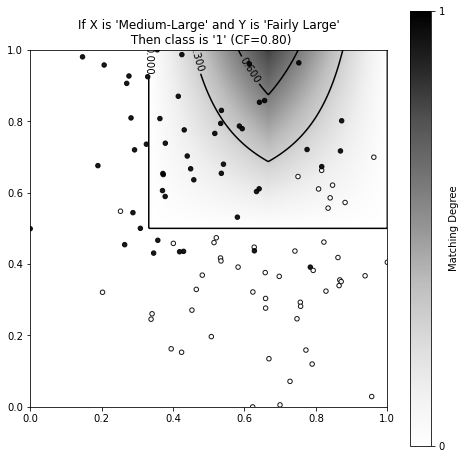

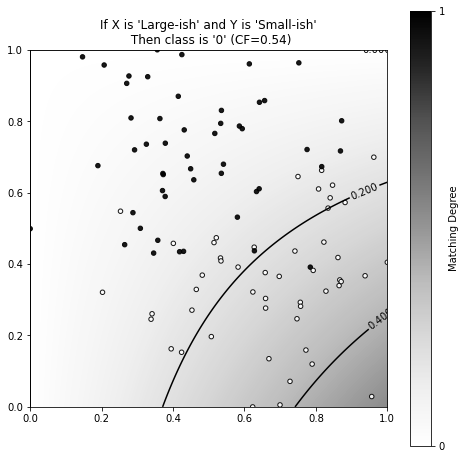

In [39]:
def visualize_rule_2d(fuzzy_sets, weight, label, res=201):
  x = np.linspace(0, 1, res)
  y = np.linspace(0, 1, res)
  xx, yy = np.meshgrid(x, y)
  vfunc = np.vectorize(fuzz.compatibility_2d, excluded=['fuzzy_sets'])
  z = weight * vfunc(fuzzy_sets = fuzzy_sets, x=xx, y=yy)

  plt.figure(figsize=(8, 8))
  contours = plt.contour(xx, yy, z, 2, colors='black')
  plt.clabel(contours)

  plt.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='Greys')
  plt.colorbar(ticks=range(2), label='Matching Degree')
  plt.clim(0, 1)

  plt.scatter(x=X1[:,0], y=X1[:,1], c=Y1, cmap='binary', edgecolor='k', alpha=0.9, s=20)


  title_string = "If X is '%s' and Y is '%s'" % (
      fuzz.set_id_to_english(fuzzy_sets[0]), fuzz.set_id_to_english(fuzzy_sets[1]))
  title_string += "\n Then class is '%s' (CF=%.2f)" % (label, weight)
  plt.title(title_string)

  plt.show()
visualize_rule_2d((1, 8), 0.5978, '1', res=501)
visualize_rule_2d((8, 5), 0.8024, '1', res=501)
visualize_rule_2d((2, 1), 0.5394, '0', res=501)

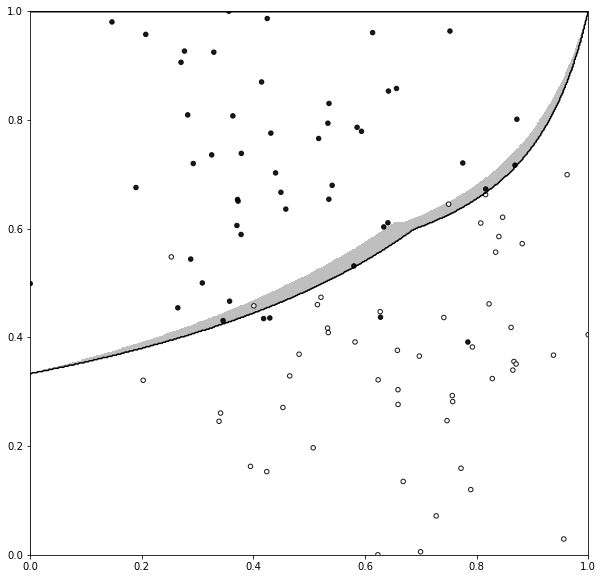

In [50]:
# Boundaries with no reject
res = 501
data = pd.read_csv("data/toy_reject_data.txt", usecols=range(res), nrows=501, header=None).to_numpy()
data_no_reject = pd.read_csv("data/toy_no_reject.txt", usecols=range(res), nrows=501, header=None).to_numpy()


x = np.linspace(0, 1, res)
y = np.linspace(0, 1, res)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.contour(X, Y, data_no_reject[::-1], levels=[0.5], colors=['black'])
ax.contourf(X, Y, data[::-1], levels=[-1.5, -0.5], colors=['gray'], alpha=0.5)
ax.scatter(x=X1[:,0], y=X1[:,1], c=Y1, cmap='binary', edgecolor='k', alpha=0.9, s=20)